# Data Transformation #

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first dataset
oasis_filtered = pd.read_csv('./oasis_filtered.csv')
# Display the first few rows of the dataset
oasis_filtered.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,Group,Source
0,OAS1_0001_MR1,F,R,74,12.0,3.0,29.0,0.0,Nondemented,OASIS-1
1,OAS1_0002_MR1,F,R,55,16.0,1.0,29.0,0.0,Nondemented,OASIS-1
2,OAS1_0003_MR1,F,R,73,16.0,3.0,27.0,0.5,Demented,OASIS-1
3,OAS1_0010_MR1,M,R,74,18.0,2.0,30.0,0.0,Nondemented,OASIS-1
4,OAS1_0011_MR1,F,R,52,14.0,2.0,30.0,0.0,Nondemented,OASIS-1


**Normalization** is particularly necessary for models that are sensitive to the scale of the input data, such as logistic regression. Models like decision trees and their derivatives (random forests, XGBoost) are generally less sensitive to the scale because they are based on splitting nodes in trees rather than calculating distances or dot products.


**Handling Attributes for Different Models:**

**Logistic Regression**: Requires normalization for all numerical features and one-hot encoding for categorical features. It assumes data features on a similar scale.

**Decision Trees, Random Forest, XGBoost**: These models do not require normalization necessarily but will perform better with encoded categorical variables. They handle different scales and distributions in data efficiently, but encoding helps in turning categorical variables into a usable format.

**Choice of Scaling:**

- For linear models such as logistic regression, standard scaling is generally preferred because it keeps the scale of the input features consistent, improving the convergence behavior of the algorithm.

- For tree-based models (like decision trees, random forests, XGBoost), scaling is not strictly necessary as these models are not sensitive to the magnitude of features. They split nodes based on order instead of value. However, using scaling can lead to faster convergence during training, particularly for algorithms that utilize gradient-based optimization (like XGBoost).

**Standard scaling** has been applied to the numeric columns (Age, Educ, MMSE, SES, CDR). This scales the data such that each feature has a mean of zero and a standard deviation of one, which helps in handling outliers and does not assume a fixed range for the data. SES, being somewhat ordinal, could also be scaled using standard scaling to maintain the relative distances between categories.

**Label Encoding** has been applied to the categorical columns (M/F). This encodes the categories as integers.

**Lambda function for Binary Transformation of Group Attribute**

To convert the "Group" attribute into a binary classification where:

"Nondemented" is represented by 0,
"Demented" or "Converted" (which is considered as now "Demented") is represented by 1,
we use a mapping transformation technique (`apply` function with a Lambda) where we map the current categorical values to these numeric values. A new column **Diagnosis** is created, which becomes the new target variable.

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Creating instances of scaler and encoder
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Selecting columns to scale
numeric_columns = ['Age', 'Educ', 'MMSE', 'SES', 'CDR']
categorical_columns = ['M/F']

# Applying the mapping using the lambda function
oasis_filtered['Diagnosis'] = oasis_filtered['Group'].apply(lambda x: 1 if x in ['Demented', 'Converted'] else 0)

# Applying Standard Scaling to numeric columns
oasis_filtered[numeric_columns] = scaler.fit_transform(oasis_filtered[numeric_columns])

# Applying Label Encoding to categorical columns
for column in categorical_columns:
    oasis_filtered[column] = label_encoder.fit_transform(oasis_filtered[column])

# Display the transformed data
oasis_filtered.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,Group,Source,Diagnosis
0,OAS1_0001_MR1,0,R,-0.122643,-0.901332,0.508156,0.478191,-0.764869,Nondemented,OASIS-1,0
1,OAS1_0002_MR1,0,R,-2.050225,0.537958,-1.314609,0.478191,-0.764869,Nondemented,OASIS-1,0
2,OAS1_0003_MR1,0,R,-0.224095,0.537958,0.508156,-0.065249,0.560032,Demented,OASIS-1,1
3,OAS1_0010_MR1,1,R,-0.122643,1.257604,-0.403227,0.749911,-0.764869,Nondemented,OASIS-1,0
4,OAS1_0011_MR1,0,R,-2.354580,-0.181687,-0.403227,0.749911,-0.764869,Nondemented,OASIS-1,0


In [3]:
# Save to CSV
oasis_filtered.to_csv('./oasis_filtered_1.csv', index=False)

In [4]:
oasis_filtered.describe()

,M/F,Age,Educ,SES,MMSE,CDR,Diagnosis
count,608.000000,6.080000e+02,6.080000e+02,6.080000e+02,6.080000e+02,6.080000e+02,608.000000
mean,0.393092,-1.636118e-16,2.512610e-16,-1.782200e-16,-3.871172e-16,7.304099e-17,0.465461
std,0.488839,1.000823e+00,1.000823e+00,1.000823e+00,1.000823e+00,1.000823e+00,0.499216
min,0.000000,-4.282162e+00,-3.060267e+00,-1.314609e+00,-6.314808e+00,-7.648693e-01,0.000000
25%,0.000000,-5.284498e-01,-9.013319e-01,-4.032268e-01,-3.369685e-01,-7.648693e-01,0.000000
50%,0.000000,8.026029e-02,-1.816867e-01,-4.032268e-01,4.781914e-01,-7.648693e-01,0.000000
75%,1.000000,6.889703e-01,5.379585e-01,5.081557e-01,7.499113e-01,5.600325e-01,1.000000
max,1.000000,2.312197e+00,3.056717e+00,2.330920e+00,7.499113e-01,4.534738e+00,1.000000


**Note: Hand (All subjects were right-handed so this column was not used in the analysis)**

## Correlation Analysis ##

To explore relationships between demographic factors, cognitive scores, and group classifications in the Oasis filtered dataset, we will look into correlations between these variables and visualize how they interact. This will help us understand potential predictors for Alzheimer’s disease and how different variables might influence cognitive health. 
Let’s start by calculating and visualizing the correlations among the numerical variables:

1. Correlation Analysis: This will give us a quantitative measure of the relationships between numerical variables such as Age, Gender (M/F), education, socioeconomic status, MMSE, CDR and Diagnosis.

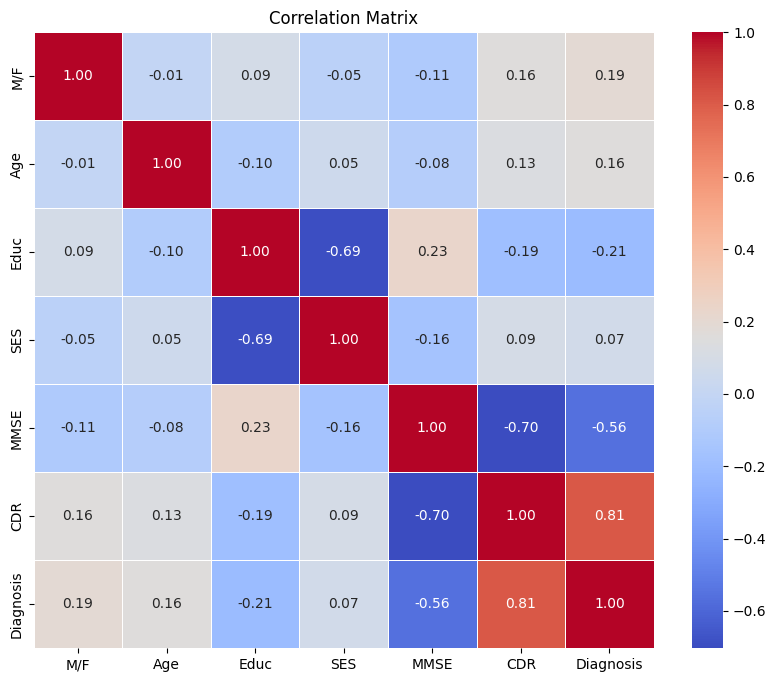

In [5]:
# Calculate correlations among numerical variables
correlation_matrix = oasis_filtered[['M/F','Age', 'Educ', 'SES', 'MMSE', 'CDR', 'Diagnosis']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



The correlation heatmap displays the correlation coefficients between numerical variables, which range from -1 (perfect negative correlation) to +1 (perfect positive correlation). Here are key observations:

1. **CDR and MMSE (-0.70):**

There is a strong negative correlation. As the Mini-Mental State Examination (MMSE) scores decrease (indicating cognitive impairment), the Clinical Dementia Rating (CDR) scores increase (indicating greater severity of dementia). This is consistent with the expectation that lower cognitive performance is associated with higher levels of dementia.

2. **CDR and Diagnosis (0.81):**

There is a strong positive correlation which implies As the CDR score increases, indicating more severe dementia symptoms, the likelihood of a dementia diagnosis (binary, 1) increases. This correlation confirms the predictive value of CDR in determining dementia status.

3. **MMSE and Diagnosis (-0.56):**

There is a moderate negative correlation. Lower MMSE scores, which suggest poorer cognitive function, correlate significantly with a positive dementia diagnosis. This relationship supports the use of MMSE as an effective tool in cognitive assessment related to dementia.

4. **Educ and SES (-0.69):**

There is a strong negative correlation. This might seem surprising as higher education levels are typically associated with higher SES. However, in this dataset, it appears that within the demographic sampled, those with higher education might belong to a lower SES. This could suggest that the dataset includes individuals who have attained higher education but do not necessarily hold high-income jobs, or it might reflect a specific demographic characteristics or the way SES is coded .

5. **M/F and Diagnosis (0.19):**

There is a moderate positive correlation. This suggests a trend where one gender (likely males, encoded as 1) is slightly more associated with dementia diagnoses than the other. This could reflect gender-specific differences in the prevalence or detection of dementia.

6. **Age and Diagnosis (0.16):**

There is a  positive correlation, though it is relatively weak. This suggests that older age is associated with higher CDR scores, which aligns with the general understanding that the risk of dementia increases with age.


# Class Balance #

In [6]:
# Get the value counts for the Diagnosis column
diagnosis_counts = oasis_filtered['Diagnosis'].value_counts()
print(diagnosis_counts)

0    325
1    283
Name: Diagnosis, dtype: int64


The classes in the diagnosis column, with 325 entries for 'Nondemented' and 283 entries for 'Demented', are relatively balanced. Here, the split is roughly 53% (Nondemented) to 47% (Demented), which is quite close to an even 50:50 distribution.  Since the classes are nearly balanced, we can proceed with the modeling approaches without initial concerns about significant risk of bias toward one class over the other or a class imbalance. 

# Logistic Regression #

Regularization adjusts the complexity of the model, reducing overfit and improving the model's ability to generalize.
Cross-validation evaluates how well your model, including its regularization settings, performs on unseen data. It can also help you select the optimal level of regularization (e.g., choosing the regularization strength parameter).

**Logistic Regression with L2 Regularization**

**Why L2 Regularization?**

- Logistic regression with L2 regularization (also known as Ridge regression in linear models) helps to prevent overfitting by penalizing large coefficients in the model. This regularization method adds a penalty term which is equal to the square of the magnitude of coefficients.
- L2 regularization is particularly useful when dealing with multicollinearity and helps to improve model generalization.

**Model Building with k-Fold Cross-Validation and GridSearchCV**

**k-Fold Cross-Validation:**

- This method splits the dataset into k smaller sets (or folds). The model is trained on k-1 of these folds, with the remaining part used as the test set. This process is repeated k times, with each of the k folds used exactly once as the test set.
- The advantage is that all observations are used for both training and testing, and each observation is used for testing exactly once. This provides a robust estimate of model performance.

**GridSearchCV:**

- GridSearchCV is used to exhaustively search through a specified parameter grid for a given model. It helps in finding the best combination of parameters.
- It uses cross-validation internally to evaluate the performance of each parameter combination, ensuring that the chosen model is both well-tuned and robust.

Next, we'll set up the k-fold cross-validation and use GridSearchCV to optimize the hyperparameters for our logistic regression model. We'll explore hyperparameters like the regularization strength (C in logistic regression) and possibly others like solver if necessary. Let's proceed with setting up and training the model. 

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant features and target
X = oasis_filtered[['Age', 'M/F', 'Educ', 'SES', 'MMSE', 'CDR']]
y = oasis_filtered['Diagnosis']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', max_iter=10000)

# Setting up GridSearchCV to find the best regularization strength
param_grid = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']} # Regularization strengths

# Setup GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != grid_search.predict(X_test)).sum()))

Number of mislabeled points out of a total 122 points : 5


The model has been trained using GridSearchCV with a logistic regression estimator, exploring 20 different values for the regularization strength (C) across 5 folds of the data. Here are the best parameters and the best score from the grid search:

**Best Parameters and Best Score**

- Best Parameters: This tells us the optimal settings for the hyperparameters C (regularization strength) and solver that were found during the grid search.
- Best Score: This is the highest score achieved during the grid search, based on the chosen scoring method (accuracy).

In [8]:
# Best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 0.08858667904100823, 'solver': 'liblinear'}, 0.9691142436355985)

The best parameters found by the GridSearchCV for the logistic regression model are:

- C (Regularization Strength): 0.08858667904100824
- Solver: 'liblinear'

The best cross-validation accuracy score achieved with these parameters is approximately 96.91%.

Let's proceed with evaluating the model on the test set using these best parameters

**Model Evaluation on Test Set**

Now, let's use these best parameters to evaluate the model on the test set. We'll calculate various performance metrics, and also visualize the ROC curve to assess the model's ability to distinguish between the two classes (demented vs. non-demented).

0.9590163934426229
Number of mislabeled points out of a total 122 points : 5


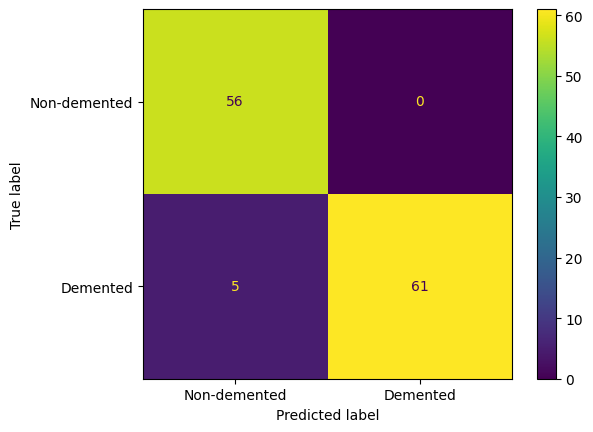

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Use the best estimator from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluation metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

report, conf_matrix

# Plotting the confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
labels=['Non-demented', 'Demented']
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != best_model.predict(X_test)).sum()))

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       1.00      0.92      0.96        66

    accuracy                           0.96       122
   macro avg       0.96      0.96      0.96       122
weighted avg       0.96      0.96      0.96       122



**Model Evaluation Summary**

The logistic regression model evaluated on the test set produced the following results:

- Precision: How many selected items are relevant.
    - For non-demented (0): 92%
    - For demented (1): 100%
    
- Recall (sensitivity): How many relevant items are selected.
    - For non-demented (0): 100%
    - For demented (1): 92%
    
- F1-Score: A balance between precision and recall.
    - Both classes have an F1-score of 96%.
    
- Accuracy: Overall, the model correctly classified 96% of the cases in the test set.

- Confusion Matrix:
    - True negatives (non-demented correctly identified): 56
    - True positives (demented correctly identified): 61
    - False negatives (demented incorrectly identified as non-demented): 5
    - False positives (non-demented incorrectly identified as demented): 0
    
- ROC-AUC: The area under the ROC curve is about 0.967, indicating a very good performance of the model in distinguishing between the demented and non-demented cases.

**ROC Curve Visualization**

0.9672619047619048


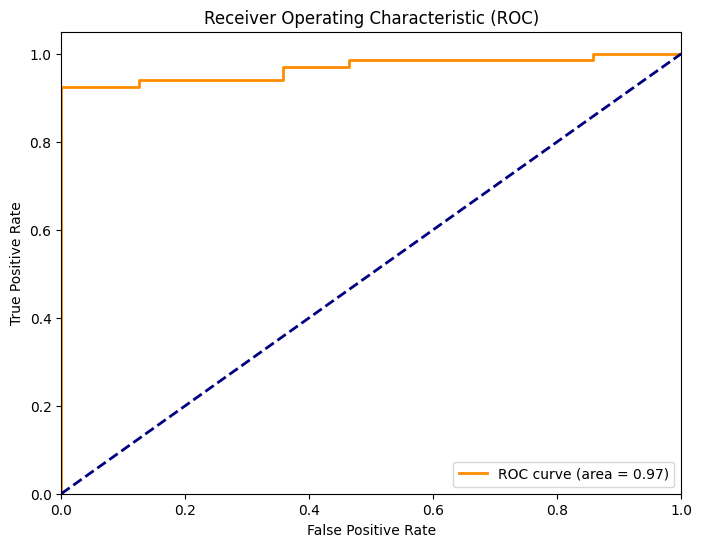

In [11]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The ROC curve shown above provides a graphical representation of the logistic regression model's ability to distinguish between two groups: people who have dementia and those who don't. The orange line represents our model's performance. It's very close to the top left corner, indicating that our model does a great job at correctly identifying people with dementia (high true positive rate or sensitivity) and not mistakenly identifying those without it (low false positive rate or specificity). The area under this orange line, which scores about 0.967, shows how effectively the model performs.

The dotted blue line represents a random guess, akin to flipping a coin, where the chances of being correct or incorrect are equal. If our model did no better than random guessing, the orange line would align with this dotted line. The further the orange line is from the blue dotted line, the better our model is at making predictions.

Based on the curve and the area under it, we can trust this model to accurately predict whether someone has dementia based on the features used—like cognitive scores (MMSE, CDR), socio-demographic data (Age, SES, Educ), and gender (M/F)—are practically relevant and are typically accessible in clinical settings. This makes the model not only theoretically effective but also practically useful in real-world scenarios where medical professionals might assess dementia risk. It's reliable and performs significantly better than a random guess, as evidenced by the curve being far from the dotted line and close to the perfect score area.

In [12]:
import time

# Start the timer for the training process
start_time = time.time()

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# End the training timer and start the prediction timer
train_time = time.time() - start_time
start_time = time.time()

# Predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# End the prediction timer
predict_time = time.time() - start_time

# Total samples processed (training + testing)
total_samples = len(X_train) + len(X_test)

# Calculate the time per sample
time_per_sample = (train_time + predict_time) / total_samples

print(f"Total training time: {train_time:.4f}s")
print(f"Total prediction time: {predict_time:.4f}s")
print(f"Processing time per sample: {time_per_sample:.4f}s/sample")

Total training time: 1.1937s
Total prediction time: 0.0040s
Processing time per sample: 0.0020s/sample
